In [1]:
import sys


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D

Using TensorFlow backend.


In [3]:
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils, generic_utils

In [4]:
import tensorflow as tf
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
import skvideo.io
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import preprocessing

/home/misha/tensorflow/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)
/home/misha/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


### Image specification

In [6]:
img_rows,img_cols,img_depth=120,160,15

### Training data

In [7]:
X_tr = [] # variable to store entire dataset

In [8]:
filename = '/home/misha/Documents/Thesis/Dataset/BNG_white_1'
videodata = skvideo.io.vreader(filename + '.mov')
frames = open(filename + '.csv', 'r')

my_frame = 0
frame_number = 0

for frame in videodata:
    
    if (frame_number >= 369 and frame_number < 766) or (frame_number >= 3492 and frame_number < 3610):
        
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        res_img = cv2.resize(frame, (img_cols, img_rows), interpolation=cv2.INTER_AREA)
        X_tr.append(res_img)
#         print(frame_number)
    frame_number += 1
print(len(X_tr))


515


In [9]:
filename = '/home/misha/Documents/Thesis/Dataset/race_night'
videodata = skvideo.io.vreader(filename + '.mov')
frames = open(filename + '.csv', 'r')

my_frame = 0
frame_number = 0

for frame in videodata:
    if (frame_number >= 663 and frame_number < 758) or (frame_number >= 967 and frame_number < 1038):
        
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        res_img = cv2.resize(frame, (img_cols, img_rows), interpolation=cv2.INTER_AREA)
        X_tr.append(res_img)
#         print(frame_number)
    frame_number += 1
print(len(X_tr))


681


In [ ]:
len(X_tr)

### Open files

In [ ]:
def addFrames(dest_arr, fname, start, end):
    for i in range(start, end + 1):
        

In [10]:
filename = '/home/misha/Documents/Thesis/Dataset/race_night'
videodata = skvideo.io.vreader(filename + '.mov')
frames = open(filename + '.csv', 'r')
marking_data = []



for line in frames:
    line = line.split(',')
    marking_data.append([int(line[0]),int(line[1]),int(line[2])])

print(marking_data)
    
for line in marking_data:
    if line[2] == 1:
        current_frame = 0
        for frame in videodata:
            if (current_frame >= line[0] and current_frame < line[1]):
                
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                res_img = cv2.resize(frame, (img_cols, img_rows), interpolation=cv2.INTER_AREA)
                X_tr.append(res_img)
    #         print(frame_number)
            current_frame += 1
print(len(X_tr))

[[563, 958, 0], [967, 1038, 1], [1523, 1718, 0], [3770, 4050, 1], [4705, 4813, 1], [4915, 5140, 0]]
752


In [ ]:
filename = '/home/misha/Documents/Thesis/Dataset/BNG_white_1'
videodata = skvideo.io.vreader(filename + '.mov')
frames = open(filename + '.csv', 'r')

my_frame = 0
frame_number = 0

for frame in videodata:
    if (frame_number >= 10 and frame_number < 1010):
        
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        res_img = cv2.resize(frame, (img_cols, img_rows), interpolation=cv2.INTER_AREA)
        X_tr.append(res_img)
#         print(frame_number)
    frame_number += 1
print(len(X_tr))



# load class 1
filename = '/home/misha/Documents/Thesis/Dataset/race_night'
videodata = skvideo.io.vreader(filename + '.mov')
frames = open(filename + '.csv', 'r')

my_frame = 0
frame_number = 0

for frame in videodata:
    if (frame_number >= 10 and frame_number < 1010):
        
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        res_img = cv2.resize(frame, (img_cols, img_rows), interpolation=cv2.INTER_AREA)
        X_tr.append(res_img)
#         print(frame_number)
    frame_number += 1
print(len(X_tr))

In [ ]:
def addFrames(frames_list, start, end):
    for x in range(start, end + 1):
        cap.set(1, x)
        ret, frame = cap.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        res_img = cv2.resize(frame, (img_rows, img_cols), interpolation=cv2.INTER_AREA) # size reducing
        frames_list.append(res_img)
    

### Reading accident class training

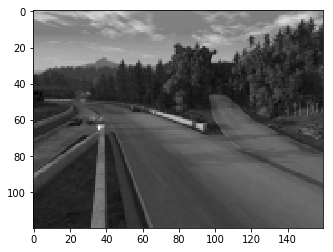

In [11]:
# frames numbers hardcoded just for debug. Normally they are in .csv file.
# addFrames(X_tr, 3248, 3283)
# addFrames(X_tr, 3492, 3527)

plt.imshow(X_tr[-1],cmap='gray')
plt.show()


In [ ]:
# frames = open(filename + '.csv', 'r')
# ret, frame = cap.read()
# frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY )
plt.imshow(img, cmap='gray')
plt.show()
print(img)

##### Image resize

In [ ]:
# now resize in reading dunction
plt.imshow(X_tr[630], cmap='gray')
plt.show()

### Reading all frames classes (takes long time)

In [ ]:
# X_tr_array.shape

### CNN Training parameters

In [12]:
# Importaint step
X_tr_array = np.array(X_tr)
# print(X_tr_array)

In [ ]:
norm_ipt = np.rollaxis(np.rollaxis(norm_input,2,0),2,0)
print(norm_ipt.shape)
acc_ipt = np.rollaxis(np.rollaxis(acc_input,2,0),2,0)
print(acc_ipt.shape)



In [ ]:
# convert to array
X_tr_norm = np.array(norm_ipt)
X_tr_acc = np.array(acc_ipt)

num_samples_norm = len(X_tr_norm)
num_samples_acc = len(X_tr_acc)
print(num_samples_norm)
print(num_samples_acc)

In [ ]:
print(X_tr_array.shape)

In [13]:

X_tr_array = np.expand_dims(X_tr_array, axis=4)
print(X_tr_array.shape)

(752, 120, 160, 1)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


##### Assign label to each class

In [14]:
num_samples = len(X_tr_array)
# train_set = np.zeros(num_samples, 1, img_rows,img_cols,img_depth))
label = np.ones((num_samples,),dtype = int)
label[0:1000] = 0
label[1000:] = 1

train_data = [X_tr_array,label]

(X_train, y_train) = (train_data[0],train_data[1])
print('X_Train shape:', X_train.shape)

X_Train shape: (752, 120, 160, 1)


In [15]:
train_set = np.zeros((num_samples, img_rows,img_cols,img_depth))
patch_size = 15

for h in range(num_samples):
    train_set[h][0][:][:][:]=X_train[h,:,:,:]


ValueError: could not broadcast input array from shape (120,160,1) into shape (160,15)

In [16]:
print(train_set.shape, 'train samples')

(752, 120, 160, 15) train samples


##### CNN training parameters

In [32]:
batch_size = 2
nb_classes = 2 
nb_epoch = 100


##### convert class vectors to binary class matrices

In [19]:
Y_train = np_utils.to_categorical(y_train, nb_classes)

##### number of convolutional filters to use at each layer

In [20]:
nb_filters = [32, 32]

##### level of pooling to perform at each layer (POOL x POOL)

In [21]:
nb_pool = [2, 2]

##### Level of convolution to perform at each layer (CONV x CONV)

In [22]:
nb_conv = [3,3]

### Pre-processing

In [23]:
train_set = train_set.astype('float32')

train_set -= np.mean(train_set)

train_set /=np.max(train_set)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [24]:
print(img_rows, img_cols, img_depth)

120 160 15


### Define model

In [25]:
model = Sequential()
model.add(Convolution3D(16, (4, 4, 3),
input_shape=(120, 160, 15, 1), activation='relu'))

model.add(MaxPooling3D(pool_size=(nb_pool[0], nb_pool[0], nb_pool[0])))

model.add(Convolution3D(32, (3, 3, 3), activation='relu'))

model.add(MaxPooling3D(pool_size=(2, 2, 2)))

model.add(Convolution3D(64, (3, 3, 2), activation='relu'))

model.add(MaxPooling3D(pool_size=(2, 2, 1)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, init='normal', activation='relu'))

# model.add(Dropout(0.5))

model.add(Dense(nb_classes,init='normal'))

model.add(Activation('softmax'))

# model.optimizer.lr.assign(0.1)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, kernel_initializer="normal", activation="relu")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, kernel_initializer="normal")`


In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 117, 157, 13, 16)  784       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 58, 78, 6, 16)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 56, 76, 4, 32)     13856     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 28, 38, 2, 32)     0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 26, 36, 1, 64)     36928     
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 13, 18, 1, 64)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 18, 1, 64)     0         
__________

In [27]:
# Split the data
X_train_new, X_val_new, y_train_new,y_val_new =  train_test_split(train_set, Y_train, test_size=0.2, random_state=4)

In [28]:
X_train_new = np.expand_dims(X_train_new, axis=4)
print(X_train_new.shape)

X_val_new = np.expand_dims(X_val_new, axis=4)
print(X_val_new.shape)

(601, 120, 160, 15, 1)
(151, 120, 160, 15, 1)


#### Training

In [33]:
hist = model.fit(X_train_new, y_train_new, validation_data=(X_val_new,y_val_new),
          batch_size=batch_size,nb_epoch = nb_epoch,shuffle=True)

Train on 601 samples, validate on 151 samples
Epoch 1/100
  4/601 [..............................] - ETA: 25s - loss: 0.0370 - acc: 1.0000

/home/misha/tensorflow/lib/python3.5/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


601/601 [==============================] - 23s - loss: 0.0337 - acc: 1.0000 - val_loss: 0.0306 - val_acc: 1.0000
Epoch 2/100
601/601 [==============================] - 23s - loss: 0.0280 - acc: 1.0000 - val_loss: 0.0255 - val_acc: 1.0000
Epoch 3/100
601/601 [==============================] - 23s - loss: 0.0234 - acc: 1.0000 - val_loss: 0.0214 - val_acc: 1.0000
Epoch 4/100
601/601 [==============================] - 23s - loss: 0.0196 - acc: 1.0000 - val_loss: 0.0180 - val_acc: 1.0000
Epoch 5/100
601/601 [==============================] - 23s - loss: 0.0166 - acc: 1.0000 - val_loss: 0.0152 - val_acc: 1.0000
Epoch 6/100
601/601 [==============================] - 23s - loss: 0.0141 - acc: 1.0000 - val_loss: 0.0129 - val_acc: 1.0000
Epoch 7/100
601/601 [==============================] - 23s - loss: 0.0120 - acc: 1.0000 - val_loss: 0.0110 - val_acc: 1.0000
Epoch 8/100
601/601 [==============================] - 23s - loss: 0.0102 - acc: 1.0000 - val_loss: 0.0094 - val_acc: 1.0000
Epoch 9/100


601/601 [==============================] - 22s - loss: 3.6692e-06 - acc: 1.0000 - val_loss: 3.3975e-06 - val_acc: 1.0000
Epoch 64/100
601/601 [==============================] - 22s - loss: 3.1778e-06 - acc: 1.0000 - val_loss: 2.9802e-06 - val_acc: 1.0000
Epoch 65/100
601/601 [==============================] - 22s - loss: 2.7578e-06 - acc: 1.0000 - val_loss: 2.5630e-06 - val_acc: 1.0000
Epoch 66/100
601/601 [==============================] - 22s - loss: 2.3895e-06 - acc: 1.0000 - val_loss: 2.2650e-06 - val_acc: 1.0000
Epoch 67/100
601/601 [==============================] - 22s - loss: 2.0684e-06 - acc: 1.0000 - val_loss: 1.9074e-06 - val_acc: 1.0000
Epoch 68/100
601/601 [==============================] - 22s - loss: 1.7935e-06 - acc: 1.0000 - val_loss: 1.6689e-06 - val_acc: 1.0000
Epoch 69/100
601/601 [==============================] - 22s - loss: 1.5553e-06 - acc: 1.0000 - val_loss: 1.4305e-06 - val_acc: 1.0000
Epoch 70/100
601/601 [==============================] - 22s - loss: 1.3509e

### Split the data

In [ ]:
plt.figure(figsize=(30,20))
for i in range(0,10):
    img = acc_frames[i]
    plt.subplot(1,10,i + 1)
    plt.imshow(img,cmap='gray')
    
    img = normal_frames[i]
    plt.subplot(2,10,i + 1)
    plt.imshow(img,cmap='gray')
plt.show()

### Train the model

In [ ]:
frame = acc_frames[-1]
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
value = 1
hsv[:,:,2] += value
hsv = cv2.cvtColor(frame, cv2.COLOR_HSV2RGB)

plt.imshow(hsv)
plt.show()

In [ ]:
score

### Evaluate the model

In [30]:
score = model.evaluate(X_val_new, y_val_new, batch_size=batch_size)
print('Test score:', score[0])
print('Test accuracy:', score[1]) 


150/151 [============================>.] - ETA: 0sTest score: 0.037050884217
Test accuracy: 1.0


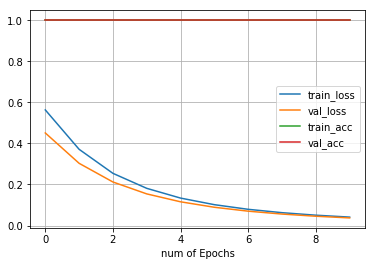

In [31]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']

plt.plot(train_loss)
plt.plot(val_loss)
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('num of Epochs')
plt.grid(True)
plt.legend(['train_loss','val_loss','train_acc', 'val_acc'])
plt.style.use(['classic'])
plt.show()

### Plots the result

In [ ]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(10)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
print(plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])